Przykłady różnych ćwiczeń dotyczących przetwarzania sygnałów dwuwymiarowych(Dźwięku).

In [1]:
%pylab inline
import scipy
from scipy.io import wavfile, loadmat
from scipy.signal import butter, freqz, lfilter

Populating the interactive namespace from numpy and matplotlib


Przykładowe sygnały  f1  i  f2 wraz z funkcją  fs  która jest sumą tych sygnałów:

fs(x)=k1⋅f1(x)+k2⋅f2(x) 

Dwa układy jako funkcje, które jako argumenty przyjmują zrówno funkcję  f  jak i jej wartości  x :

H1(f,x)=f(2x) 

H2(f,x)=(f(x))2 

Empiryczne sprawdzenie czy układy są liniowe czy też nie, za pomocą twierdzenia o liniowości.

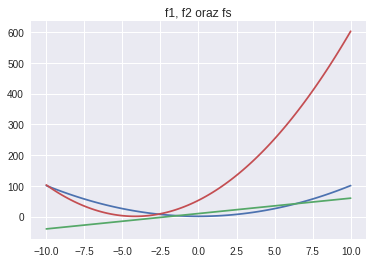

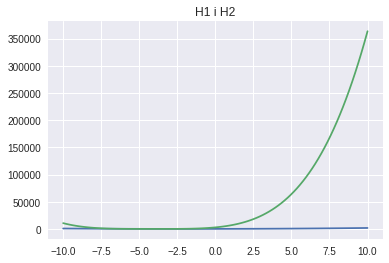

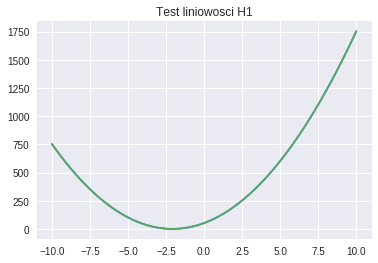

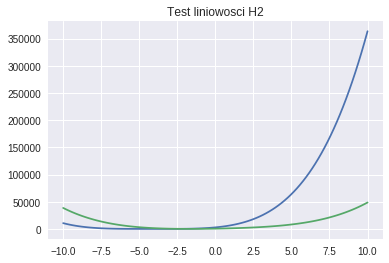

In [2]:
#-----------------------------1. Funkcje f1 oraz f2
def f1(x):
    return x**2+1
  
def f2(x):
    return x*5+10
  
x=np.linspace(-10,10,100)
plt.figure(0)
plt.title('f1, f2 oraz fs')
plt.plot(x,f1(x))
plt.plot(x,f2(x))

#-----------------------------2. fs jako suma funkcji f1 i f2
def fs(x):
    return k1*f1(x)+k2*f2(x)
  
k1 = 3
k2 = 5  
plt.figure(0)
plt.plot(x,fs(x))  

#-----------------------------3. Układy przyjmujące jako parametry, funkcję wraz z parametrem tej funkcji.
def H1(f,x):
    return f(2*x)

def H2(f,x):
    return f(x)**2
  
plt.figure(1)
plt.title('H1 i H2')
plt.plot(x,H1(fs,x))
plt.plot(x,H2(fs,x))

#-----------------------------4. Empiryczne sprawdzenie liniowości tych układów.
def H1_test(f1,f2,x):
    return k1*H1(f1,x)+k2*H1(f2,x)
  
def H2_test(f1,f2,x):
    return k1*H2(f1,x)+k2*H2(f2,x)
  
plt.figure(2)
plt.title('Test liniowosci H1')
plt.plot(x,H1(fs,x))
plt.plot(x,H1_test(f1,f2,x))
'''Wykresy sie pokrywaja co oznacza, ze uklad jest liniowy.'''
plt.figure(3)
plt.title('Test liniowosci H2')
plt.plot(x,H2(fs,x))
plt.plot(x,H2_test(f1,f2,x))  
'''Wykresy sie różnią co oznacza, ze uklad nie jest liniowy.'''
print()

Okienkowanie sygnału za pomocą różnych dostępnych funkcji okienkujących.

Text(0.5, 1.0, 'Kaiser 8.6')

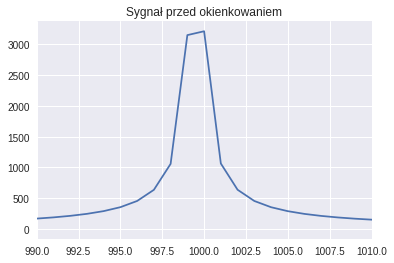

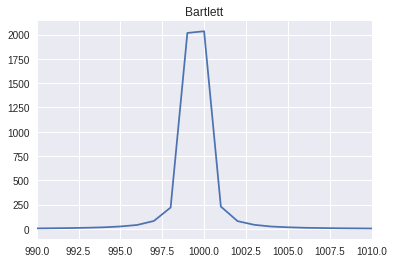

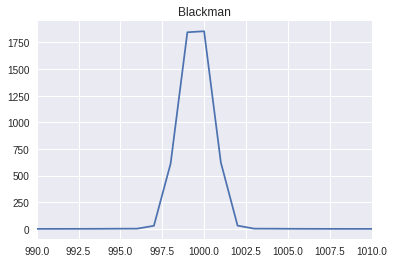

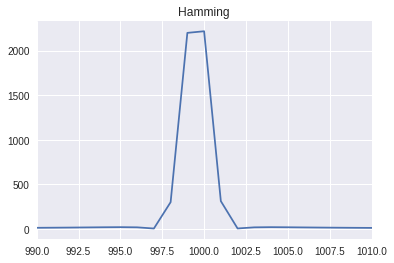

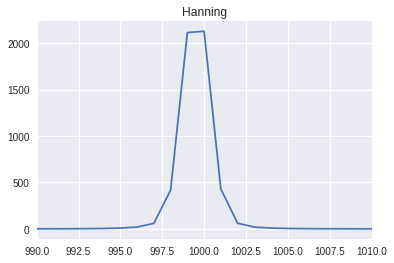

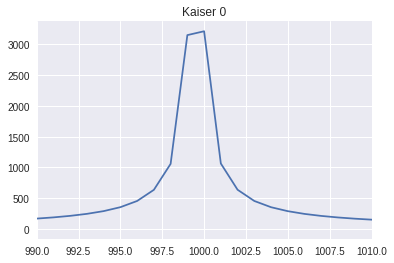

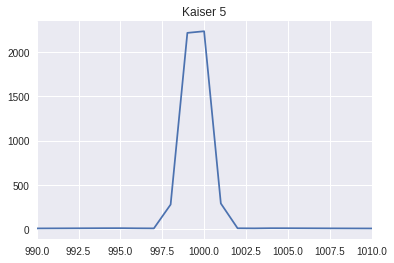

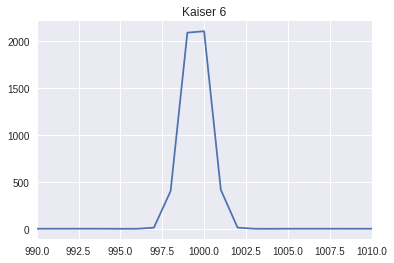

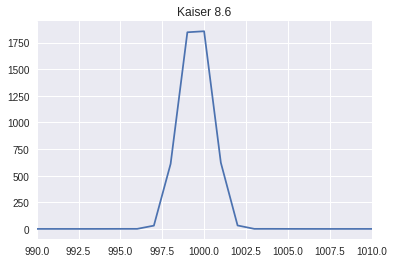

In [3]:
Fs=10000
T=1
t=arange(0,T,1/Fs)

f=linspace(999,1001,100)

A=[]
for i in range(f.size):
  y=sin(2*pi*f[i]*t)
  Y=fft.fft(y)
  l=max(abs(Y))
  A.append(l)
  
worst=f[argmin(A)]
yw=sin(2*pi*worst*t)
Yw=fft.fft(yw)

f=linspace(0,Fs,Yw.size)

figure()
plot(abs(Yw))
xlim(990,1010)
title("Sygnał przed okienkowaniem")


#Bartlett
wBartlett=bartlett(yw.size)
YwBartlett=fft.fft(yw*wBartlett)

figure()
plot(abs(YwBartlett))
xlim(990,1010)
title("Bartlett")


#Blackman
wBlackman=blackman(yw.size)
YwBlackman=fft.fft(yw*wBlackman)

figure()
plot(abs(YwBlackman))
xlim(990,1010)
title("Blackman")


#Hamming
wHamming=hamming(yw.size)
YwHamming=fft.fft(yw*wHamming)

figure()
plot(abs(YwHamming))
xlim(990,1010)
title("Hamming")


#Hanning
wHanning=hanning(yw.size)
YwHanning=fft.fft(yw*wHanning)

figure()
plot(abs(YwHanning))
xlim(990,1010)
title("Hanning")


#Kaiser 0, 5, 6, 8.6
wKaiser=kaiser(yw.size,0)
YwKaiser=fft.fft(yw*wKaiser)

figure()
plot(abs(YwKaiser))
xlim(990,1010)
title("Kaiser 0")

wKaiser=kaiser(yw.size,5)
YwKaiser=fft.fft(yw*wKaiser)

figure()
plot(abs(YwKaiser))
xlim(990,1010)
title("Kaiser 5")

wKaiser=kaiser(yw.size,6)
YwKaiser=fft.fft(yw*wKaiser)

figure()
plot(abs(YwKaiser))
xlim(990,1010)
title("Kaiser 6")

wKaiser=kaiser(yw.size,8.6)
YwKaiser=fft.fft(yw*wKaiser)

figure()
plot(abs(YwKaiser))
xlim(990,1010)
title("Kaiser 8.6")

Filtr SOI usuwający składową 2 kHz z sumy sygnałów: 1kHz, 2kHz, 3kHz.

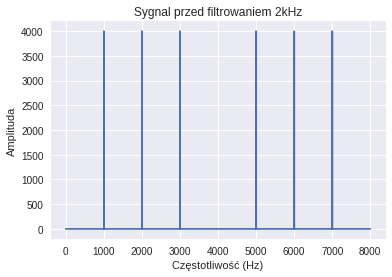

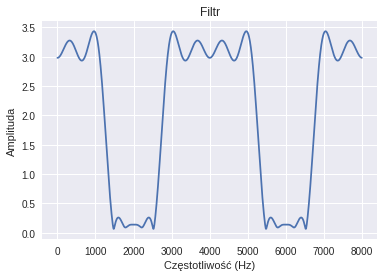

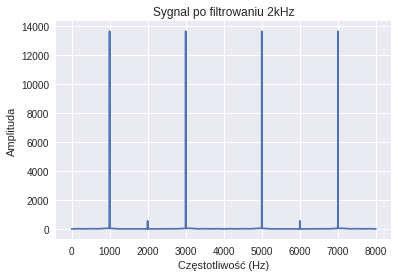

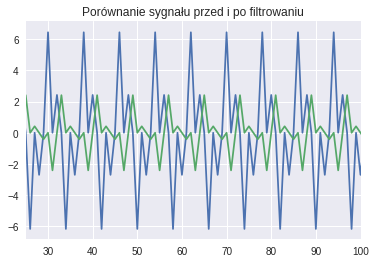

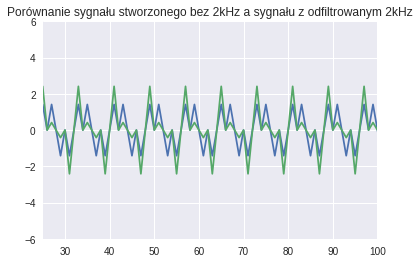

In [4]:
#Tworzymy sygnał. Jednocześnie istotne jest odpowiednie Fs by później stworzony filtr odpowiednio się nakładał na sygnał.
T=1
Fs=8000
t=arange(0,T,1/Fs)
f1=1000
f2=2000
f3=3000

y1=sin(2*pi*f1*t)
y2=sin(2*pi*f2*t)
y3=sin(2*pi*f3*t)
y=y1+y2+y3
yTest=y1+y3

Y=fft.fft(y)
fy=linspace(0,Fs,Y.size)
figure()
plot(fy,abs(Y))
ylabel('Amplituda')
xlabel('Częstotliwość (Hz)')
title('Sygnal przed filtrowaniem 2kHz')

#Tworzenie filtru
N=25
R=4

h=sinc(arange(-R,R,(2*R)/N))
h2=h.copy()
h2[::2]*=-1
h3=h+h2
h/=h3.sum()

plot(h3)

ht=zeros(1024)
ht[:h3.size]=h3
H=fft.fft(ht)
f=linspace(0,Fs,H.size)

figure()
plot(f,abs(H))
ylabel('Amplituda')
xlabel('Częstotliwość (Hz)')
title('Filtr')

#Łączymy filtr z sygnałem.
yf=convolve(y,h3)

#Wyniki
YF=fft.fft(yf)
F=linspace(0,Fs,YF.size)
figure()
plot(F,abs(YF))
ylabel('Amplituda')
xlabel('Częstotliwość (Hz)')
title('Sygnal po filtrowaniu 2kHz')

figure()
plot(yf)
plot(y)
xlim(25,100)
title('Porównanie sygnału przed i po filtrowaniu')

figure()
plot(yTest)
plot(y)
xlim(25,100)
ylim(-6,6)
title('Porównanie sygnału stworzonego bez 2kHz a sygnału z odfiltrowanym 2kHz')

print()

Filtr NOI usuwający składową 2 kHz z sumy sygnałów: 1kHz, 2kHz, 3kHz. Wraz ze sprawdzeniem czy na pewno filtr jest stabilny.

Filtr jest stabilny


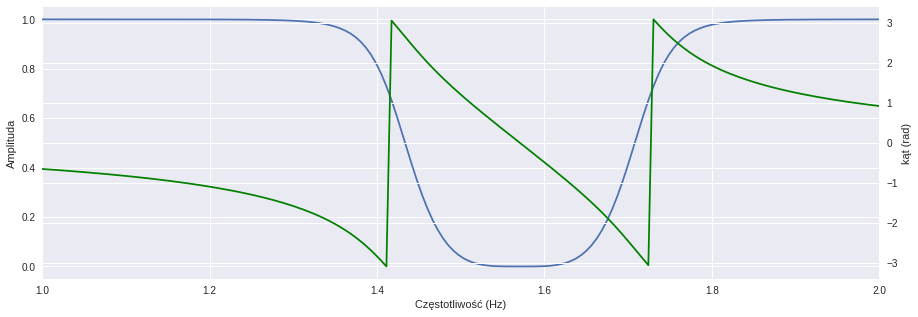

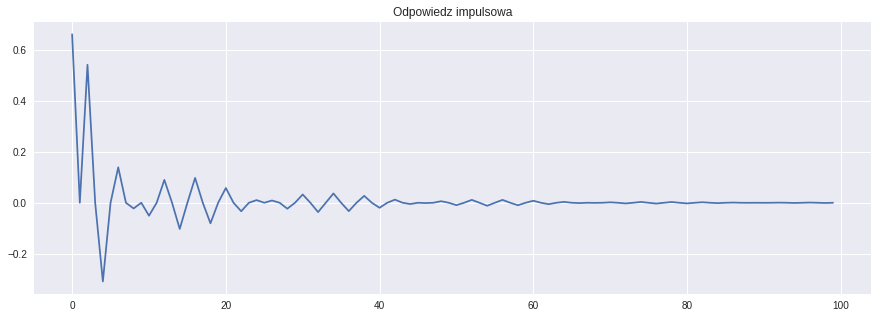

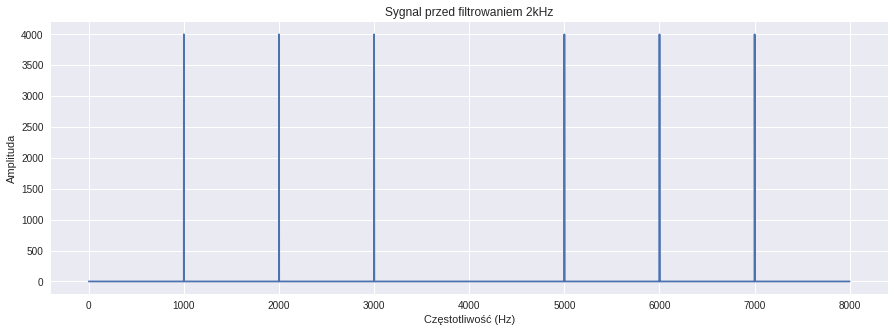

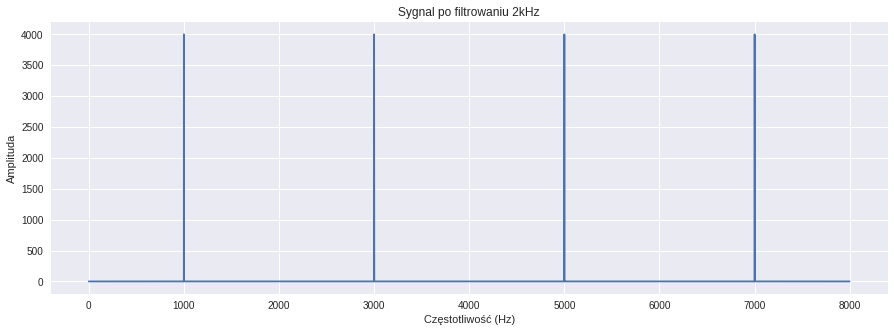

In [5]:
#Tworzenie sygnalu (te same parametry co w zadaniu wyzej)
T=1
Fs=8000
t=arange(0,T,1/Fs)
f1=1000
f2=2000
f3=3000

y1=sin(2*pi*f1*t)
y2=sin(2*pi*f2*t)
y3=sin(2*pi*f3*t)
y=y1+y2+y3

#Tworzenie filtru
[b,a] = butter(4,[0.45, 0.55],'stop');

f,H=freqz(b,a)

#Wyglad filtru
figure(figsize(15,5))
plot(f,abs(H))
xlim(1,2,5)
ylabel('Amplituda')
xlabel('Częstotliwość (Hz)')
twinx()
plot(f,angle(H),'g')
ylabel('kąt (rad)')

#Nakladanie filtru na sygnal
x=zeros(100)
x[0]=1

yfz=lfilter(b,a,x)
yf = lfilter(b, a, y)

#Odpowiedz impulsowa
figure()
plot(yfz)
title('Odpowiedz impulsowa')

#Wyniki
Y=fft.fft(y)
F=linspace(0,Fs,Y.size)
figure()
plot(F,abs(Y))
ylabel('Amplituda')
xlabel('Częstotliwość (Hz)')
title('Sygnal przed filtrowaniem 2kHz')

YF=fft.fft(yf)
F=linspace(0,Fs,YF.size)
figure()
plot(F,abs(YF))
ylabel('Amplituda')
xlabel('Częstotliwość (Hz)')
title('Sygnal po filtrowaniu 2kHz')

#Stabilnosc filtru
if(all(abs(roots(a))<1)):
  print('Filtr jest stabilny')
else:
  print('Filtr jest niestabilny')

  
